**Модель движения спутника с задаными координатами**

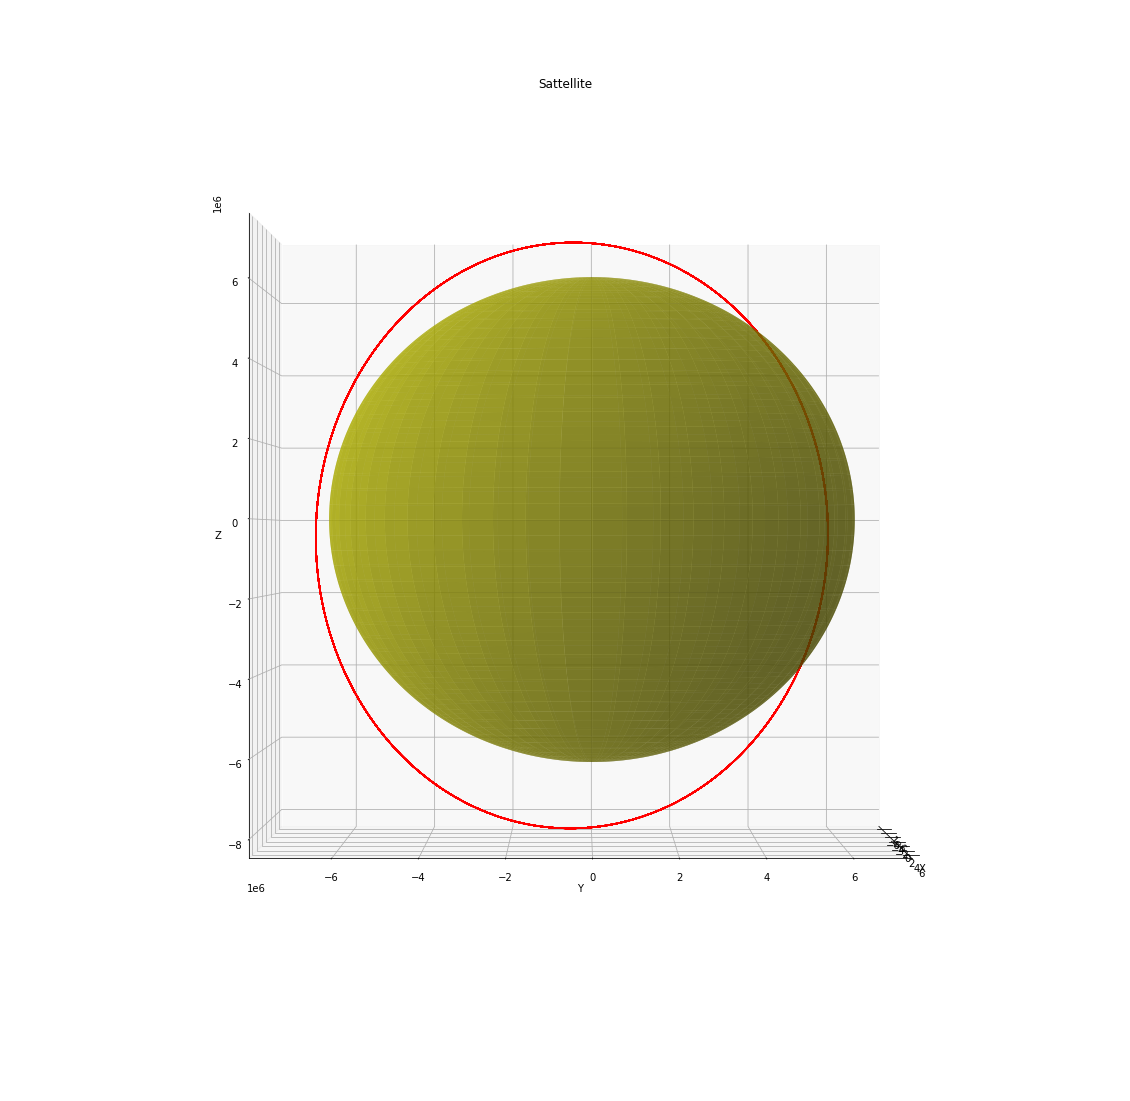

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import pi as pi
from numpy.linalg import norm


def orb_n(r, solution_one):
    phi = 90 * pi / 180
    p1 = -r[1] / r[0]
    p2 = -np.cos(phi) * r[2] / r[0]

    a = p1 ** 2 + 1
    b = 2 * p1 * p2
    c = p2 ** 2 - np.sin(phi) * np.sin(phi)

    y1 = (-b + np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
    y2 = (-b - np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)

    x1 = p1 * y1 + p2
    x2 = p1 * y2 + p2
    z = np.cos(phi)

    n_p = np.array([x1, y1, z])
    n_m = np.array([x2, y2, z])

    if solution_one:
        return n_p
    else:
        return n_m


def odefun(spis, time):
    temp_1 = spis[3:6]
    temp_2 = (-G * M * spis[0:3]) / ((norm(spis[0:3])) ** 3)
    return [temp_1[0], temp_1[1], temp_1[2], temp_2[0], temp_2[1], temp_2[2]]


G = 6.673 * 10 ** (-11)
M = 5.972 * 10 ** 24
Earth_radius = 6371000
satt_height = 450000
satt_velocity = 8100
satt_time = 93 * 60
Oz = [0, 0, 1]

North = 25.94 * pi / 180
East = 53.50 * pi / 180

init_pos = np.array([np.cos(North) * np.cos(East),
                     np.cos(North) * np.sin(East),
                     np.sin(North)])

orbit_norm = orb_n(init_pos, True)
tau = np.cross(orbit_norm, init_pos)

r0 = init_pos * (Earth_radius + satt_height)
v0 = tau * satt_velocity

x0 = [r0, v0]

tspan = np.linspace(0, 25*satt_time, 10**6)

spis = [r0[0], r0[1], r0[2], v0[0], v0[1], v0[2]]

sol = odeint(odefun, spis, tspan, rtol=0.000000000001, atol=0.0000000000001)

x = sol[:, 0]
y = sol[:, 1]
z = sol[:, 2]

count = 1000

phi = np.linspace(0, 2 * pi, count)

theta = np.linspace(0, pi, count)
theta, phi = np.meshgrid(theta, phi)

Earth_x = Earth_radius * np.cos(phi) * np.sin(theta)
Earth_y = Earth_radius * np.sin(phi) * np.sin(theta)
Earth_z = Earth_radius * np.cos(theta)

fig = plt.figure(figsize=[20, 20])
ax = plt.axes(projection='3d')
plt.title('Sattellite')
ax.plot3D(x, y, z, color='r')
ax.plot_surface(Earth_x, Earth_y, Earth_z, color='y', alpha=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(0, 0)



plt.show()

**Орбита вытянется и станет более эллиптической если увеличить скорость**

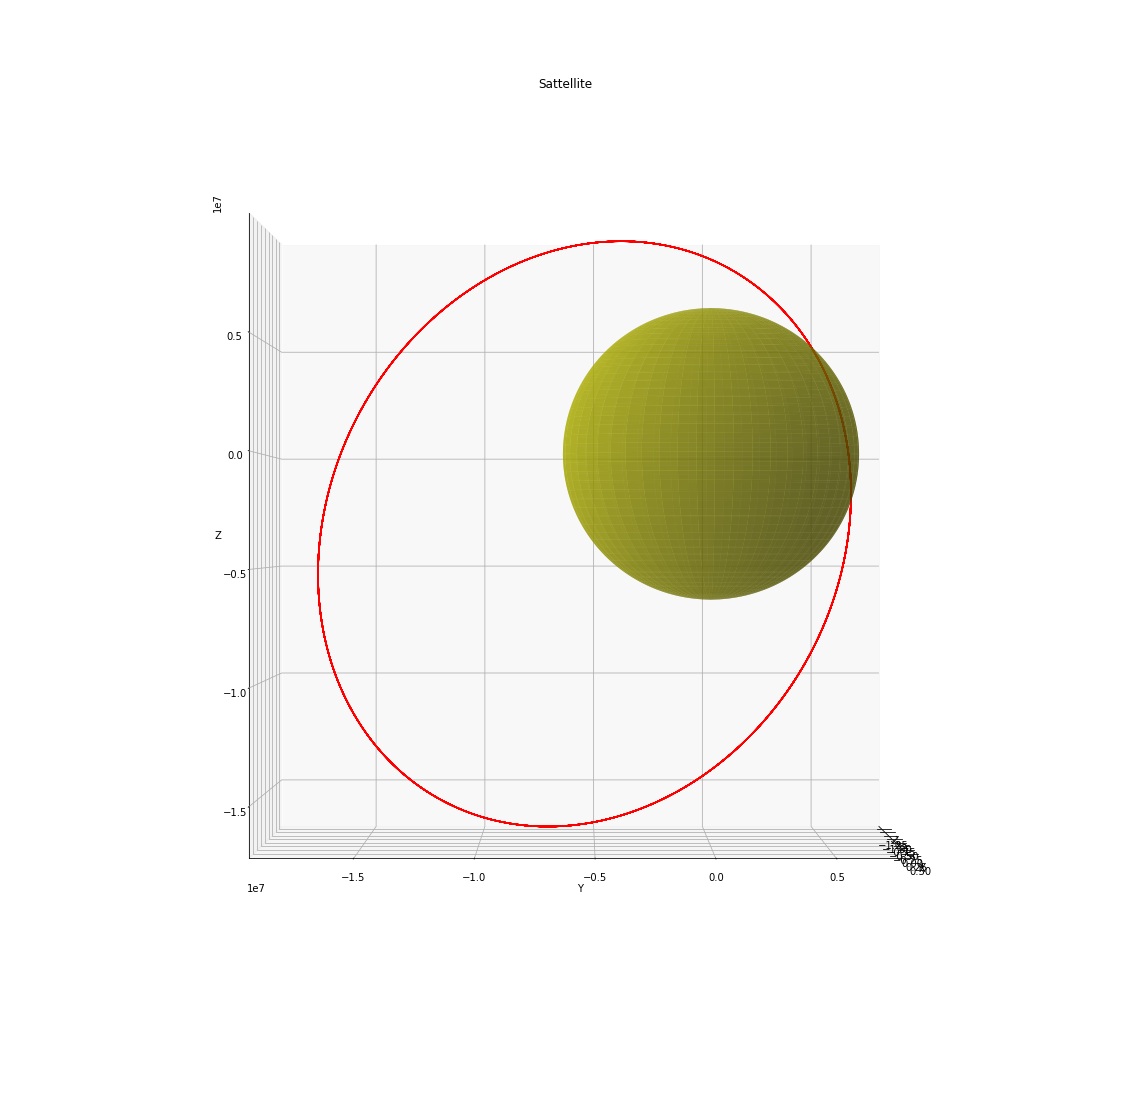

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import pi as pi
from numpy.linalg import norm


def orb_n(r, solution_one):
    phi = 90 * pi / 180
    p1 = -r[1] / r[0]
    p2 = -np.cos(phi) * r[2] / r[0]

    a = p1 ** 2 + 1
    b = 2 * p1 * p2
    c = p2 ** 2 - np.sin(phi) * np.sin(phi)

    y1 = (-b + np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
    y2 = (-b - np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)

    x1 = p1 * y1 + p2
    x2 = p1 * y2 + p2
    z = np.cos(phi)

    n_p = np.array([x1, y1, z])
    n_m = np.array([x2, y2, z])

    if solution_one:
        return n_p
    else:
        return n_m


def odefun(spis, time):
    temp_1 = spis[3:6]
    temp_2 = (-G * M * spis[0:3]) / ((norm(spis[0:3])) ** 3)
    return [temp_1[0], temp_1[1], temp_1[2], temp_2[0], temp_2[1], temp_2[2]]


G = 6.673 * 10 ** (-11)
M = 5.972 * 10 ** 24
Earth_radius = 6371000
satt_height = 450000
satt_velocity = 9500
satt_time = 93 * 60
Oz = [0, 0, 1]

North = 25.94 * pi / 180
East = 53.50 * pi / 180

init_pos = np.array([np.cos(North) * np.cos(East),
                     np.cos(North) * np.sin(East),
                     np.sin(North)])

orbit_norm = orb_n(init_pos, True)
tau = np.cross(orbit_norm, init_pos)

r0 = init_pos * (Earth_radius + satt_height)
v0 = tau * satt_velocity

x0 = [r0, v0]

tspan = np.linspace(0, 25*satt_time, 10**6)

spis = [r0[0], r0[1], r0[2], v0[0], v0[1], v0[2]]

sol = odeint(odefun, spis, tspan, rtol=0.000000000001, atol=0.0000000000001)

x = sol[:, 0]
y = sol[:, 1]
z = sol[:, 2]

count = 1000

phi = np.linspace(0, 2 * pi, count)

theta = np.linspace(0, pi, count)
theta, phi = np.meshgrid(theta, phi)

Earth_x = Earth_radius * np.cos(phi) * np.sin(theta)
Earth_y = Earth_radius * np.sin(phi) * np.sin(theta)
Earth_z = Earth_radius * np.cos(theta)

fig = plt.figure(figsize=[20, 20])
ax = plt.axes(projection='3d')
plt.title('Sattellite')
ax.plot3D(x, y, z, color='r')
ax.plot_surface(Earth_x, Earth_y, Earth_z, color='y', alpha=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(0, 0)



plt.show()

Если увеличить скорость до второй космической, то спутник покинет орбиту Земли

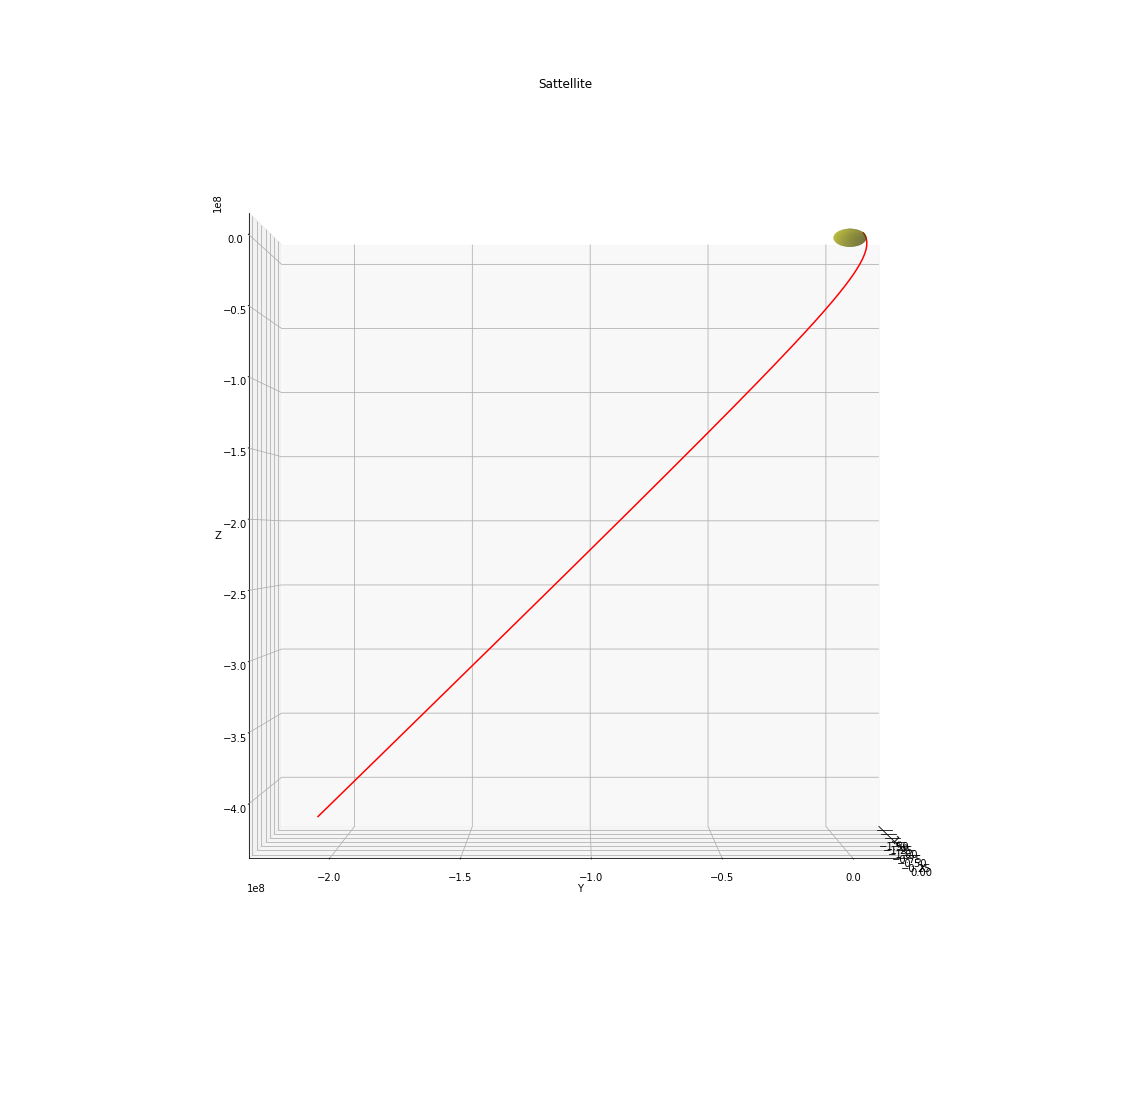

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import pi as pi
from numpy.linalg import norm


def orb_n(r, solution_one):
    phi = 90 * pi / 180
    p1 = -r[1] / r[0]
    p2 = -np.cos(phi) * r[2] / r[0]

    a = p1 ** 2 + 1
    b = 2 * p1 * p2
    c = p2 ** 2 - np.sin(phi) * np.sin(phi)

    y1 = (-b + np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
    y2 = (-b - np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)

    x1 = p1 * y1 + p2
    x2 = p1 * y2 + p2
    z = np.cos(phi)

    n_p = np.array([x1, y1, z])
    n_m = np.array([x2, y2, z])

    if solution_one:
        return n_p
    else:
        return n_m


def odefun(spis, time):
    temp_1 = spis[3:6]
    temp_2 = (-G * M * spis[0:3]) / ((norm(spis[0:3])) ** 3)
    return [temp_1[0], temp_1[1], temp_1[2], temp_2[0], temp_2[1], temp_2[2]]


G = 6.673 * 10 ** (-11)
M = 5.972 * 10 ** 24
Earth_radius = 6371000
satt_height = 450000
satt_velocity = 11200
satt_time = 93 * 60
Oz = [0, 0, 1]

North = 25.94 * pi / 180
East = 53.50 * pi / 180

init_pos = np.array([np.cos(North) * np.cos(East),
                     np.cos(North) * np.sin(East),
                     np.sin(North)])

orbit_norm = orb_n(init_pos, True)
tau = np.cross(orbit_norm, init_pos)

r0 = init_pos * (Earth_radius + satt_height)
v0 = tau * satt_velocity

x0 = [r0, v0]

tspan = np.linspace(0, 25*satt_time, 10**6)

spis = [r0[0], r0[1], r0[2], v0[0], v0[1], v0[2]]

sol = odeint(odefun, spis, tspan, rtol=0.000000000001, atol=0.0000000000001)

x = sol[:, 0]
y = sol[:, 1]
z = sol[:, 2]

count = 1000

phi = np.linspace(0, 2 * pi, count)

theta = np.linspace(0, pi, count)
theta, phi = np.meshgrid(theta, phi)

Earth_x = Earth_radius * np.cos(phi) * np.sin(theta)
Earth_y = Earth_radius * np.sin(phi) * np.sin(theta)
Earth_z = Earth_radius * np.cos(theta)

fig = plt.figure(figsize=[20, 20])
ax = plt.axes(projection='3d')
plt.title('Sattellite')
ax.plot3D(x, y, z, color='r')
ax.plot_surface(Earth_x, Earth_y, Earth_z, color='y', alpha=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(0, 0)



plt.show()

Спутник войдет в атмосферу, если скорость будет меньше, чем первая космическая (7.9 км/с для Земли)

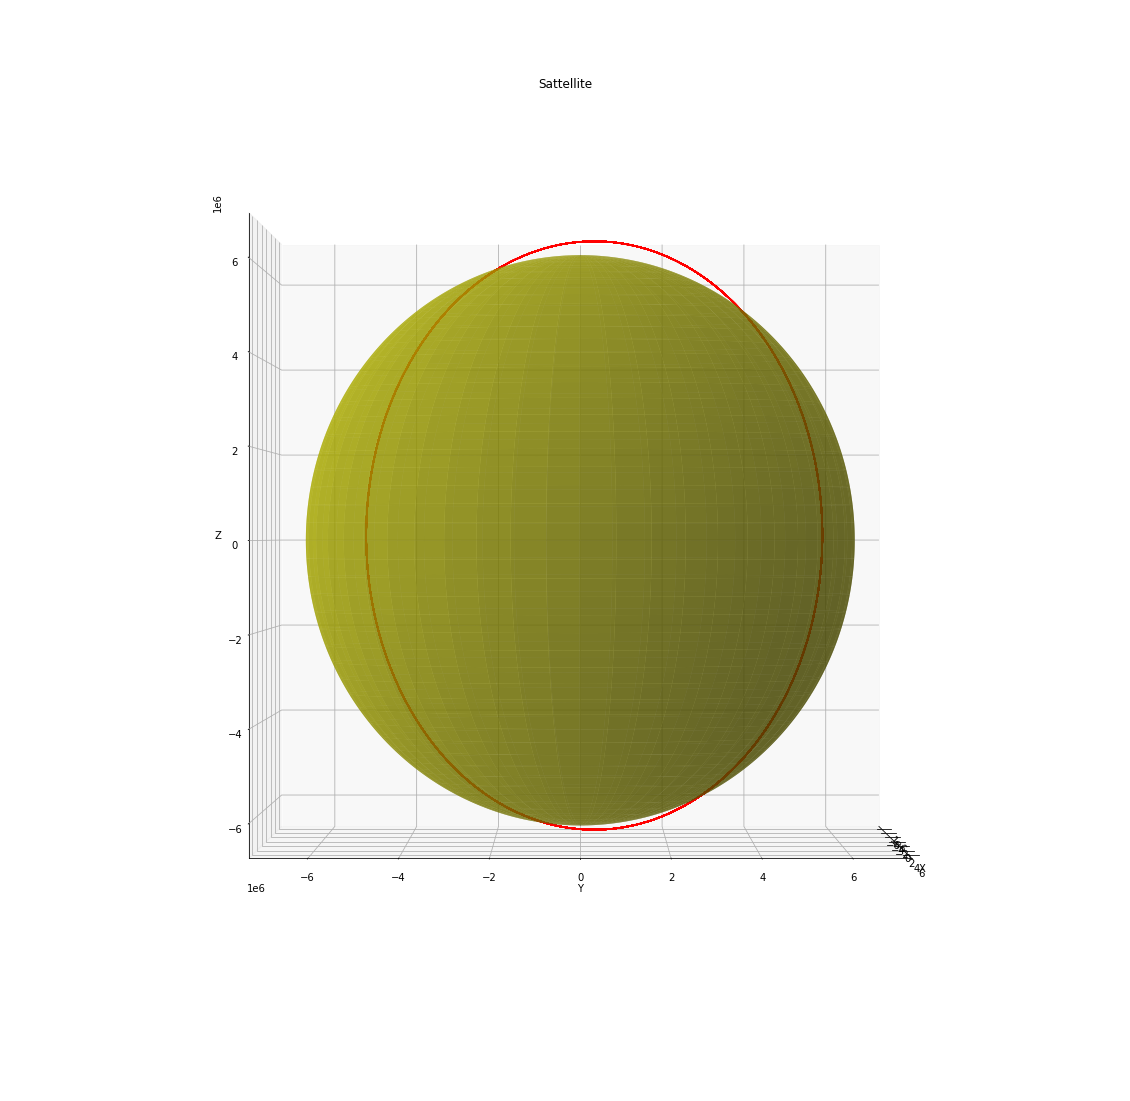

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import pi as pi
from numpy.linalg import norm


def orb_n(r, solution_one):
    phi = 90 * pi / 180
    p1 = -r[1] / r[0]
    p2 = -np.cos(phi) * r[2] / r[0]

    a = p1 ** 2 + 1
    b = 2 * p1 * p2
    c = p2 ** 2 - np.sin(phi) * np.sin(phi)

    y1 = (-b + np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
    y2 = (-b - np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)

    x1 = p1 * y1 + p2
    x2 = p1 * y2 + p2
    z = np.cos(phi)

    n_p = np.array([x1, y1, z])
    n_m = np.array([x2, y2, z])

    if solution_one:
        return n_p
    else:
        return n_m


def odefun(spis, time):
    temp_1 = spis[3:6]
    temp_2 = (-G * M * spis[0:3]) / ((norm(spis[0:3])) ** 3)
    return [temp_1[0], temp_1[1], temp_1[2], temp_2[0], temp_2[1], temp_2[2]]


G = 6.673 * 10 ** (-11)
M = 5.972 * 10 ** 24
Earth_radius = 6371000
satt_height = 450000
satt_velocity = 7500
satt_time = 93 * 60
Oz = [0, 0, 1]

North = 25.94 * pi / 180
East = 53.50 * pi / 180

init_pos = np.array([np.cos(North) * np.cos(East),
                     np.cos(North) * np.sin(East),
                     np.sin(North)])

orbit_norm = orb_n(init_pos, True)
tau = np.cross(orbit_norm, init_pos)

r0 = init_pos * (Earth_radius + satt_height)
v0 = tau * satt_velocity

x0 = [r0, v0]

tspan = np.linspace(0, 25*satt_time, 10**6)

spis = [r0[0], r0[1], r0[2], v0[0], v0[1], v0[2]]

sol = odeint(odefun, spis, tspan, rtol=0.000000000001, atol=0.0000000000001)

x = sol[:, 0]
y = sol[:, 1]
z = sol[:, 2]

count = 1000

phi = np.linspace(0, 2 * pi, count)

theta = np.linspace(0, pi, count)
theta, phi = np.meshgrid(theta, phi)

Earth_x = Earth_radius * np.cos(phi) * np.sin(theta)
Earth_y = Earth_radius * np.sin(phi) * np.sin(theta)
Earth_z = Earth_radius * np.cos(theta)

fig = plt.figure(figsize=[20, 20])
ax = plt.axes(projection='3d')
plt.title('Sattellite')
ax.plot3D(x, y, z, color='r')
ax.plot_surface(Earth_x, Earth_y, Earth_z, color='y', alpha=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(0, 0)



plt.show()